# 3. Bifurcations

## Preamble

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.optimize import root
from scipy.misc import derivative

import sympy as sp
import fractions as fra

from ipywidgets import interact

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%run -i "rcParameters.py"
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix';

In [3]:
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

## Utility functions

In [4]:
# find fixed poits FP and their stability sFP
# input: function f(x;r) ; initial guess for FPs; parameter r
# output: [Sfp=stable FPs, Ufp=unstable FPs]
def fP(f,fP0,r,eps=1e-6):
    sol=root(f,fP0,args=(r,))
    Sfp = []; Ufp = []
    if sol.success:
        for x in sol.x:
            xp = derivative(f,x,dx=eps,args=(r,))
            if xp < 0:
                Sfp = np.append(Sfp,x)
            else:
                Ufp = np.append(Ufp,x)
    return [Sfp,Ufp]

In [5]:
# Phase portrait:  interact plot f(x;r) 
def int_fxr(f,dx,dr,dy,FS0,eps=1e-6,nx=100,col='r',ms=10,title=''):
    x = np.linspace(dx[0],dx[1],nx)
    @interact(r=(dr[0],dr[1],dr[2]),grid=True)
    def update(r=dr[0],grid=True):
        # plot f(x;r) vs x
        fig, ax = plt.subplots(figsize=(8,5))
        ax.plot(x,f(x,r),c=col,ls='-',lw=3)
        ax.set_ylim(dy)
        ax.set_xlim(dx)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$\dot{x}=f(x;r)$')
        ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
        ax.grid(grid)
        # determine the fixed points x*
        FP = root(f,FS0,args=(r,))
        # plot x* if exist
        if FP.success:
            for x0 in FP.x:
                sFP=derivative(f,x0,dx=eps,args=(r,))
                if sFP < 0: # stable PF
                    ax.plot(x0,0,'o',mfc=col,mec=col,ms=ms)
                else:
                    ax.plot(x0,0,'o',mfc='w',mec=col,ms=ms)

        ax.set_title(title,color='b')
        plt.show()

In [13]:
# Bifurcation diagram: x vs r
# Q - function takes in parameter
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$b$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots()
    ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel('$x^\star$')
    ax.set_title(title,color='b')
    plt.show()    

In [7]:
# interactive Streamline plot: x(t;r)
def int_xtr(f,t_max,dx,dr,FP0,Ng=40,dens=[0.5,1],title=''):
    t = np.linspace(0,t_max,Ng)
    x = np.linspace(dx[0],dx[1],Ng)
    X,Y = np.meshgrid(t,x)
    @interact(r=(dr[0],dr[1],dr[2]),grid=False)
    def update(r=dr[0],grid=False):
        [Sx0,Ux0]=fP(f,FP0,r)
        # plot the slope field 
        fig, ax0=plt.subplots(figsize=(8,5))
        ax0.streamplot(X,Y, 1+0*X,f(Y,r),density=dens,
                      linewidth=1,color='k',arrowstyle='->')

        for x0 in Sx0:
            ax0.hlines(x0,0,t_max,colors='r',ls='-',lw=2)
        for x0 in Ux0:
            ax0.hlines(x0,0,t_max,colors='b',ls='--',lw=2)

        ax0.grid(grid)  
        ax0.set_xlim(0,t_max)
        ax0.set_ylim(dx)
        ax0.set_xlabel('$t$')
        ax0.set_ylabel('$x$')
        ax0.set_title(title,color='b')
        plt.show()

In [8]:
# set minor tick marks on/off; default on
def m_tick_on():
    plt.rcParams['xtick.minor.visible'] = True
    plt.rcParams['ytick.minor.visible'] = True
def m_tick_off():
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    
m_tick_on()

## 3.1 Saddle-Node Bifurcation   $\; \dot{x}=r\pm x^2$

### $\dot{x}=f(x;r)=r+x^2$

Phase portrait

In [32]:
# define f(x;r)
f_snp = lambda x,r: r+x**2

# interactive phase portrait 
dx = [-4,4]
dr = [-3,2,0.2] ; dy=[-4,6]
FS0= [-1,1]
int_fxr(f_snp,dx,dr,dy,FS0)

interactive(children=(FloatSlider(value=-3.0, description='r', max=2.0, min=-3.0, step=0.2), Checkbox(value=Tr…

Bifurcation diagram

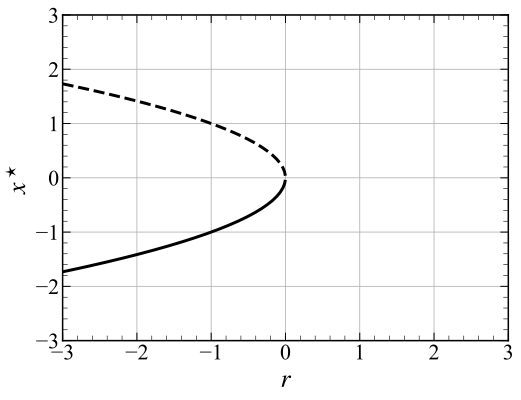

In [10]:
BF_diag(f_snp,-3,3,-3,3)

$x(t)$ streamline plot

In [11]:
int_xtr(f_snp,t_max=3.,dx=[-3.95,4],dr=[-2,2,0.5],FP0=[-2,2])

interactive(children=(FloatSlider(value=-2.0, description='r', max=2.0, min=-2.0, step=0.5), Checkbox(value=Fa…

### $\dot{x}=f(x;r)=r-x^2$

Phase portrait

In [25]:
# define f(x;r)
f_snm = lambda x,r: r - x**2

# constract the interactive phase portrait 
dx = [-3,3]
dr = [-2,4,0.2] ; dy=[-4,6]
FS0= [-1,1]
int_fxr(f_snm,dx,dr,dy,FS0)

interactive(children=(FloatSlider(value=-2.0, description='r', max=4.0, min=-2.0, step=0.2), Checkbox(value=Tr…

Bifurcation diagram

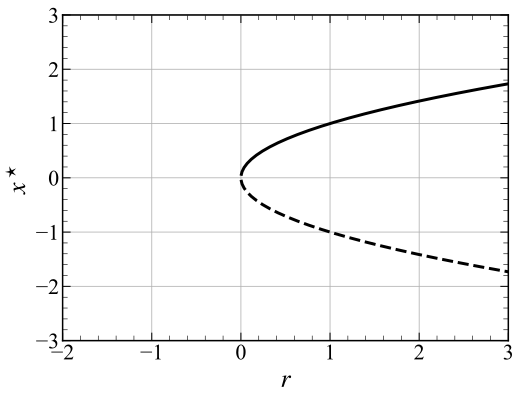

In [13]:
BF_diag(f_snm,-3,3,-2,3)

$x(t)$ streamline plot

In [14]:
int_xtr(f_snm,t_max=3.,dx=[-3.95,4],dr=[-2,3,0.5],FP0=[-2,2])

interactive(children=(FloatSlider(value=-2.0, description='r', max=3.0, min=-2.0, step=0.5), Checkbox(value=Fa…

### Example 3.1.2

Show that the first-order system $\dot{x}=r-x-e^{-x}$ undergoes a saddle-node bifurcation as $r$ is varied, and find the value of $r$ at the bifurcation point.

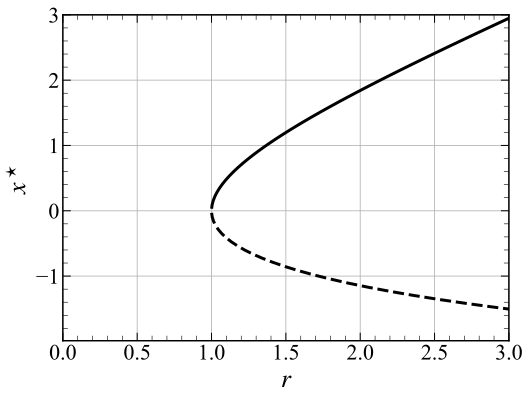

In [15]:
# define f(x;r)
f_e0 = lambda x,r: r-x-np.e**(-x)
# bifurcation diagram
BF_diag(f_e0,-1.99,3,0,3)

## 3.2 Transcritical Bifurcation    $\; \dot{x}=rx-x^2$

In [16]:
# define f(x;r)
f_tc = lambda x,r: r*x - x**2

# constract the interactive phase portrait 
dx = [-4,6]
dr = [-3,4,0.5] ; dy=[-4,5]
FS0= [-2,4]
int_fxr(f_tc,dx,dr,dy,FS0)

interactive(children=(FloatSlider(value=-3.0, description='r', max=4.0, min=-3.0, step=0.5), Checkbox(value=Tr…

Bifurcation diagram

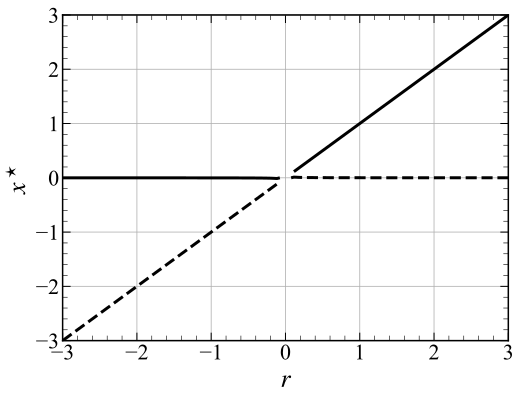

In [17]:
BF_diag(f_tc,-3,3,-3,3)

## 3.4 Pitchfork Bifurcation

### Supercritical Pitchfork Bifurcations   $\; \dot{x}=rx-x^3$

Find the fixed points [$f(x;r)=0$] and their stability [stable for $\partial_xf(x;r) < 0$]

In [18]:
# define f(x;r)
f_pfp = lambda x,r: r*x - x**3

# constract the interactive phase portrait 
dx = [-3,3]
dr = [-2,4,0.2] ; dy=[-4,6]
FS0= [-2,0,2]
int_fxr(f_pfp,dx,dr,dy,FS0)

interactive(children=(FloatSlider(value=-2.0, description='r', max=4.0, min=-2.0, step=0.2), Checkbox(value=Tr…

Bifurcation diagram

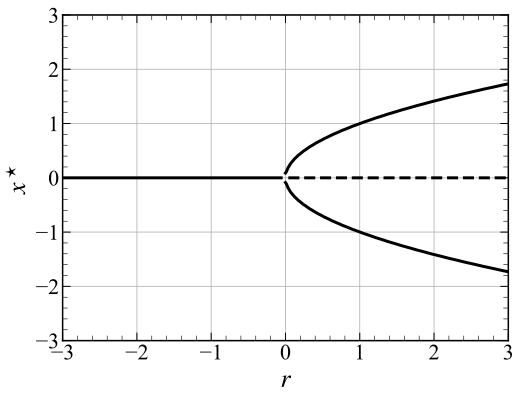

In [19]:
BF_diag(f_pfp,-3,3,-3,3)

$x(t)$ streamline plot

In [20]:
int_xtr(f_pfp,t_max=3.,dx=[-3.95,4],dr=[-3,3,0.5],FP0=[-2,0,2])

interactive(children=(FloatSlider(value=-3.0, description='r', max=3.0, min=-3.0, step=0.5), Checkbox(value=Fa…

### Example 3.4.1      $\dot{x}=-x + \beta\tanh{x}$

Equations similar to $\dot{x} = - x + \beta\tanh{x}$ arise in statistical mechanical models of magnets and neural networks. Show that this equation undergoes a _supercritical pitchfork bifurcation_ as $\beta$ is varied. Then give a numerically accurate plot of the fixed points for each $\beta$.

In [26]:
# define f(x;r) with r=beta
f_e1 = lambda x,a,b: x*(1-x) - b*x/(x+a)

# constract the interactive phase portrait 
dx = [-4,4]
dr = [-3.5,3.5,0.5] ; dy=[-4,4]
FS0= [-2,0,2]
int_fxr(f_e1,dx,dr,dy,FS0)

interactive(children=(FloatSlider(value=-3.5, description='r', max=3.5, min=-3.5, step=0.5), Checkbox(value=Tr…

Bifurcation diagram

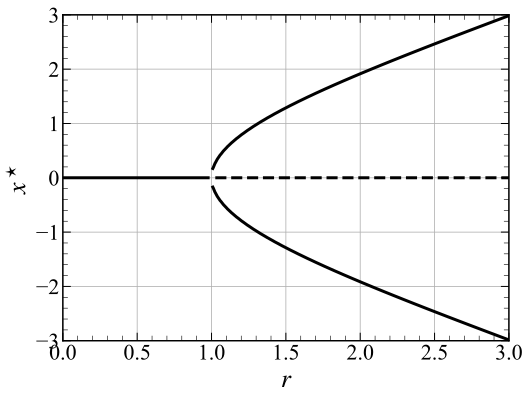

In [22]:
BF_diag(f_e1,-3,3,0,3)

$x(t)$ streamline plot

In [23]:
int_xtr(f_e1,t_max=3.,dx=[-3.95,4],dr=[0,3,0.5],FP0=[-2,0,2])

interactive(children=(FloatSlider(value=0.0, description='r', max=3.0, step=0.5), Checkbox(value=False, descri…

In [ ]:
# define f(x;r)
f_pfm0= lambda x,r: r*x + x**3
f_pfm = lambda x,r: r*x + x**3 - x**5

# constract the interactive phase portrait 
dx = [-2.5,2.5]
dr = [-2,4,0.25] ; dy=[-6,6]
FS0= [-2,0,2]
int_fxr(f_pfm0,dx,dr,dy,FS0,title='$f(x,r)=rx+x^3$')
# create stable fixed points for r>0 by adding -x^5
int_fxr(f_pfm,dx,dr,dy,FS0,title='$f(x,r)=rx+x^3-x^5$')

### Subcritical Pitchfork Bifurcations    $\; \dot{x}=rx+x^3 [- x^5]$

Find the fixed points [$f(x;r)=0$] and their stability [stable for $\partial_xf(x;r) < 0$]

In [24]:
# define f(x;r)
f_pfm0= lambda x,r: r*x + x**3
f_pfm = lambda x,r: r*x + x**3 - x**5

# constract the interactive phase portrait 
dx = [-2.5,2.5]
dr = [-2,4,0.25] ; dy=[-6,6]
FS0= [-2,0,2]
int_fxr(f_pfm0,dx,dr,dy,FS0,title='$f(x,r)=rx+x^3$')
# create stable fixed points for r>0 by adding -x^5
int_fxr(f_pfm,dx,dr,dy,FS0,title='$f(x,r)=rx+x^3-x^5$')

interactive(children=(FloatSlider(value=-2.0, description='r', max=4.0, min=-2.0, step=0.25), Checkbox(value=T…

interactive(children=(FloatSlider(value=-2.0, description='r', max=4.0, min=-2.0, step=0.25), Checkbox(value=T…

Bifurcation diagram

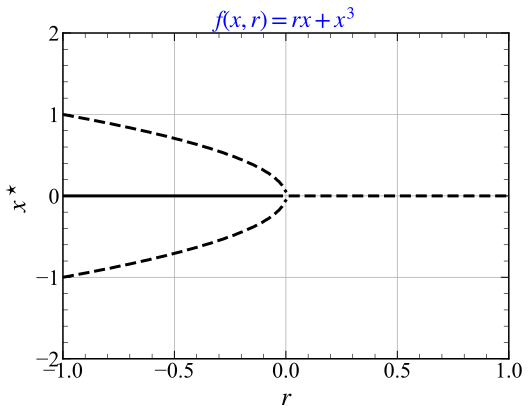

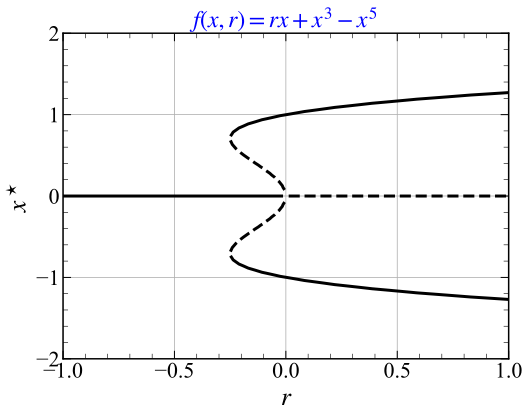

In [25]:
BF_diag(f_pfm0,-2,2,-1,1,title='$f(x,r)=rx+x^3$')
# 2 new saddle node bifurcations are created due to the x^5 term 
BF_diag(f_pfm,-2,2,-1,1,title='$f(x,r)=rx+x^3-x^5$')

$x(t)$ streamline plot

In [26]:
int_xtr(f_pfm0,t_max=3.,dx=[-1.95,2],dr=[-1,1,0.2],FP0=[-2,0,2],title='$f(x,r)=rx+x^3$')
int_xtr(f_pfm,t_max=3.,dx=[-1.95,2],dr=[-1,1,0.2],FP0=[-2,-0.5,0,0.5,2],title='$f(x,r)=rx+x^3-x^5$')

interactive(children=(FloatSlider(value=-1.0, description='r', max=1.0, min=-1.0, step=0.2), Checkbox(value=Fa…

interactive(children=(FloatSlider(value=-1.0, description='r', max=1.0, min=-1.0, step=0.2), Checkbox(value=Fa…

## 3.5 Overdamped bead on a rotating hoop

Equation of motion: $\varepsilon \ddot{\phi} = -\dot{\phi}+f(\phi;\gamma) $, where

$\gamma=\omega^2r/g$, $\varepsilon=r/gT^2=m^2gr/b^2$, $T=b/mg$ (time unit), and 
$f(\phi;\gamma)=\sin\phi(\gamma\cos\phi-1)$

In the large friction (overdamped) limit ($\varepsilon\ll 1$) the inertia term ($\varepsilon\ddot{\phi}$) can be neglected; the approximation leads to the 1D dynamical system $\dot{\phi}=f(\phi;\gamma)$ 

In [27]:
# define f(x;r)  x=phi, r=gamma
f_odb = lambda x,r: np.sin(x)*(r*np.cos(x)-1)

# constract the interactive phase portrait 
dx = [-2,2]
dr = [0,3,0.25] ; dy=[-2,2]
FS0= [-1,0,1]
int_fxr(f_odb,dx,dr,dy,FS0)

interactive(children=(FloatSlider(value=0.0, description='r', max=3.0, step=0.25), Checkbox(value=True, descri…

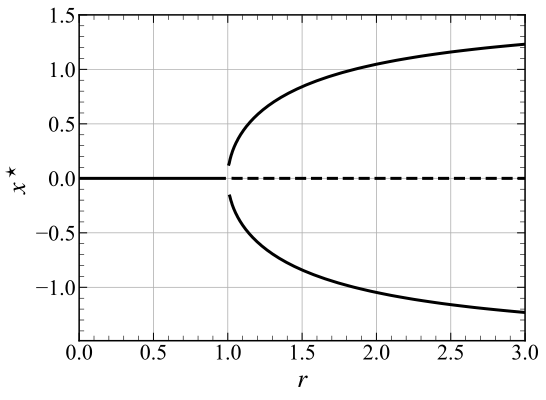

In [28]:
BF_diag(f_odb,-1.49,1.5,0,3)

#### Bead on a rotating hoop with frictions is a 2D dynamical system

The second order equation of motion is equivalent with a system of two first order ODEs

$\dot{\phi}=\Omega$

$\dot{\Omega}=\varepsilon^{-1}[f(\phi;\gamma)-\Omega]$

subject to initial conditions $\{\phi(0),\Omega(0)\}=\{\phi_0,\dot{\phi}_0\}$ 

___Note___: In the overdamped regime $\dot{\phi}_0$ is determined by the 1D dynamical equation (for given $\phi_0$), while in reality it can have any value. The paradox is resolved by the observation that in this regime a typical trajectory has two parts: (1) a rapid initial transient ($t<\varepsilon T=mr/b$) during which $\dot{\phi}$ goes from $\dot{\phi}_0$ to the 1D dynamical trajectory $\dot{\phi}(t)=f(\phi(t);\gamma)$, followed by (2) a slow drift along the 1D dynamical trajectory. In the overdamped regime only part (2) of the trajectory is considered (because $\varepsilon T=mr/b$ is small for large $b$)!  

The described situation is demonstrated numerically below.

In [29]:
# calculate x(t)=phi(t); y(t)=dx(t)/dt=Omega(t) by integrating the 2D dynamical system
# RHS of the 2D dynamical equations
def odb_Eqs(xy,t,gamma,epsi):
    x,y = xy
    return [y,(f_odb(x,gamma)-y)/epsi]
# Define discretized time, initial conditions, and parameter values
dt=0.001
t = np.arange(0,15+dt,dt)
ss = 50 # plot data at time intervals dT=ss*dt
# set initial conditions ...
xy0 = [np.deg2rad(100),2.]
# ... and parameters
gamma, epsi = 2.,0.01
# Integrate numerically the LE
%time xy = odeint(odb_Eqs,xy0,t, args=(gamma,epsi))

CPU times: user 8.38 ms, sys: 2.58 ms, total: 11 ms
Wall time: 16.1 ms


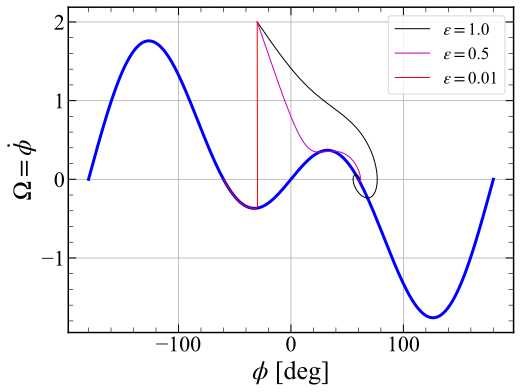

In [30]:
# plot phase portrait for different epsilon values
x_deg = np.linspace(-180,180,180)
x_rad = np.deg2rad(x_deg)

# set parameter gamma
gamma = 2
# set inital angle [deg] and angular velocity [rad/s]
xy0 = [np.deg2rad(-30),2.]

fig_odb, ax = plt.subplots()
ax.plot(x_deg,f_odb(x_rad,gamma),'b-',lw=3)
for epsi,col in zip([1.,0.5,0.01],['k','m','r']):
    xy = odeint(odb_Eqs,xy0,t, args=(gamma,epsi))
    ax.plot(np.rad2deg(xy[::ss,0]),xy[::ss,1],c=col,lw=1,label=r'$\varepsilon =$'+str(epsi))
ax.grid()
ax.legend(framealpha=0.8)
ax.set_xlabel('$\phi$ [deg]')
ax.set_ylabel('$\Omega=\dot{\phi}$')
plt.show()
# fig_odb.savefig('FIGS/odb_30.pdf')

In [45]:
# define f(x;r)
f_snp = lambda x,r: x*(1-x) - 0.5*x/(x+r)

# interactive phase portrait 
dx = [-4,4]
dr = [0.2,5,0.2] ; dy=[-4,10]
FS0= [-1,1]
int_fxr(f_snp,dx,dr,dy,FS0)

interactive(children=(FloatSlider(value=0.2, description='r', max=5.0, min=0.2, step=0.2), Checkbox(value=True…

In [46]:
import warnings
warnings.filterwarnings('ignore')

f_h = lambda x,a,b: x*(1-x) - b*x/(x+a)

@interact(a=(0.2,1.2,0.1),grid=True)
def update(a=0.2):
    f = lambda x,b: f_h(x,a,b)
    BF_diag(f,-0.2,1.2,0,1.4,title='$f(x;a,b)=x(1-x)-bx/(x+a)$')


interactive(children=(FloatSlider(value=0.2, description='a', max=1.2, min=0.2), Output()), _dom_classes=('wid…

In [54]:
# plot the stability diagram 
# determine (k,r) for the critical points 
xx = np.arange(0,10,0.01)
r_c = lr_x(xx)
k_c = lk_x(xx) 

# plot r(k) for the critical points 
# r(k) separates the regions with different number/types of FPs
fig, ax=plt.subplots()
ax.plot(k_c,r_c,color='gray',linewidth=2)
ax.fill(k_c,r_c,color='c',alpha=0.2)

ax.text(0.65,0.43,'Bistable',transform=ax.transAxes,fontsize=24,fontfamily="sans")
ax.text(0.6,0.8,'Outbreak',color='r',transform=ax.transAxes,fontsize=24,fontfamily='sans')
ax.text(0.2,0.2,'Refuge',color='g',transform=ax.transAxes,fontsize=24,fontfamily='sans')

ax.grid()
ax.set_xlim(0,20)
ax.set_ylim(0.1,0.8)
ax.set_xlabel('$k$')
ax.set_ylabel('$r$')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.show()

NameError: name 'lr_x' is not defined

## 3.6 Imperfect Bifurcations and Catastrophes $\; \dot{x}=h+rx-x^3$

Bifurcation diagram $x^*=x^*(r;h)$

In [9]:
f_h = lambda x,a,b: x*(1-x) - b*x*(x+a)

@interact(a=(0.2,1.2,0.1),grid=True)
def update(a=0.2):
    f = lambda x,b: f_h(x,a,b)
    BF_diag(f,0,4,0,1.4,title='$f(x;a,b)=h+rx-x^3$')

interactive(children=(FloatSlider(value=0.0, description='h', max=3.0, min=-3.0, step=0.5), Output()), _dom_cl…

Bifurcation diagram $x^*=x^*(h;r)$

In [22]:
f_h = lambda x,r,h: h+r*x-x**3
fx_h= lambda x,r,h: r-3*x**2
h = 0
# turn off warning
import warnings
warnings.filterwarnings("ignore")
# turn on warning
# warnings.filterwarnings("default")

@interact(r=(-1,3.5,0.5),grid=True)
def update(r=0):
    f = lambda x,h: f_h(x,r,h)
    BF_diag(f,-2.5,2.5,-3.,3.,title='$f(x;r,h)=h+rx-x^3$',x_lab='$h$')

interactive(children=(FloatSlider(value=0.0, description='r', max=3.5, min=-1.0, step=0.5), Output()), _dom_cl…

Stability diagram $h$ vs $r$: 

- (1) plot the contour $f(x_c=x^*(r,h),r,h)=0$ 
- (2) determine stable [unstable] region where $\partial_x f(x^*,r,h)<0$ [$>0$]

In our case: $f=h+rx-x^3=0$, $f_x=r-3x^2=0$, implying that $r=3x^2$ and $h=-2x^3$.

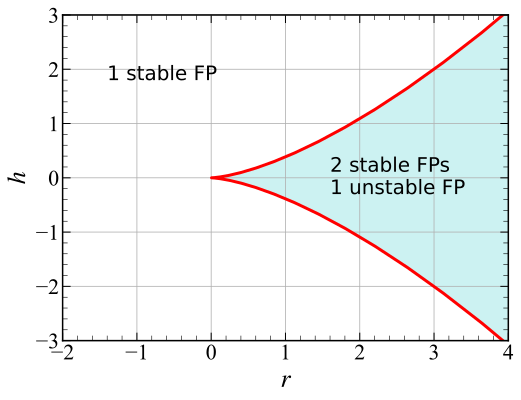

In [23]:
# determine (r,h) for the critical points 
xx = np.linspace(-2,2,50)
r_c = 3*xx**2
h_c = -2*xx**3

# plot h(r) for the critical points 
# h(r) separates the regions with different number/types of FPs
fig, ax=plt.subplots()
ax.plot(r_c,h_c,color='r',linewidth=3)
ax.fill(r_c,h_c,color='c',alpha=0.2)
ax.text(0.1,0.8,'1 stable FP',transform=ax.transAxes,fontsize=20,fontfamily="sans")
ax.text(0.6,0.45,'2 stable FPs\n1 unstable FP',transform=ax.transAxes,fontsize=20,fontfamily='sans')
ax.grid()
ax.set_xlim(-2,4)
ax.set_ylim(-3,3)
ax.set_xlabel('$r$')
ax.set_ylabel('$h$')
plt.show()

3D plot of the FP surface, i.e., $x^*=x^*(r,h)$ 

_Strategy_: 
- calculate $h=x^3-rx$ [obtained from the FP equation $f(x,r,h)=0$] on a 2D grid $(r,x)$
- use _matplotlib_'s `plot_surface(r,h,x,...)` function to render the FP surface  

In [24]:
# Plot FPs x(r,h) as h(r,x)
m_tick_off()

xr = np.linspace(-1,4,50)
yx = np.linspace(-2,2,50)
R,X= np.meshgrid(xr,yx)
H = X**3-R*X

print('H_min =',H.min(),'; H_max =',H.max())
H[H>3] = np.nan
H[H<-5]= np.nan

@interact(elev=(0,180,10),azim=(0,360,10),bd_xr=False,bd_h=(-1,1,0.25),bd_xh=False,bd_r=(-1,3,0.5))
def update(elev=25,azim=340,bd_xr=False,bd_h=0,bd_xh=False,bd_r=0):
    fig, ax = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})  

    # Creating plot 
    ax.plot_surface(R,H,X,cmap=plt.cm.bwr,alpha=0.5) 
    ax.plot_wireframe(R,H,X,rstride=2,cstride=2,color='k',linewidth=1,alpha=0.4)

    if bd_xh:
        ax.contour(R,H,X,zdir='x',levels=[bd_r],offset=R.min(),colors='k',alpha=0.5)
    if bd_xr:
        ax.contour(R,H,X,zdir='y',levels=[bd_h],offset=2.5,colors='k',alpha=0.5)


#     ax.set_zlim(-2,2)
#     ax.set_xlim(-1,3)
    ax.set_ylim(-4,2.5)
    ax.set_zticks(np.arange(-2,3,1))
    ax.set_xlabel('$r$')
    ax.set_ylabel('$h$')
    ax.set_zlabel('$x$')
    ax.view_init(elev,azim)      
 
    # show plot 
    plt.show() 

H_min = -10.0 ; H_max = 10.0


interactive(children=(IntSlider(value=25, description='elev', max=180, step=10), IntSlider(value=340, descript…

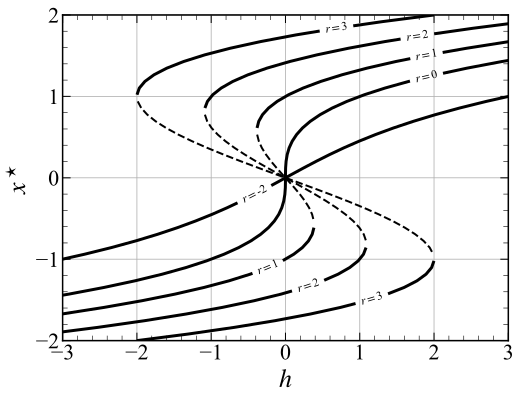

In [35]:
# FP x* vs h for r=-2,0,1,2,3
m_tick_on()

x1 = np.linspace(-2,2,50)
r1 = np.linspace(-1,4,50)
h1 = np.linspace(-3,3,50)

H1, X1 = np.meshgrid(h1,x1)

fig_h_FP, ax=plt.subplots()
for r in [-2,0,1,2,3]:
    Z1 = f_h(X1,r,H1)
    Z1x= fx_h(X1,r,H1)
    Z1u= np.ma.masked_where(Z1x<0,Z1)
    Z1s= np.ma.masked_where(Z1x>0,Z1)
    c_s = ax.contour(H1,X1,Z1s,levels=[0],colors='k',linewidths=3)
    ax.contour(H1,X1,Z1u,levels=[0],colors='k',linestyles="dashed",linewidths=2)
    ax.clabel(c_s,fmt='$r=$'+str(np.round(r,2)),inline=True,fontsize=12,colors='k')
ax.set_xlim(h1.min(),h1.max())
ax.set_ylim(x1.min(),x1.max())
ax.set_xlabel('$h$')
ax.set_ylabel('$x^\star$')
ax.grid()

In [65]:
# define f(x;r)
f_pfm0= lambda x,r: -r*x + x**2/(x**2+1)
f_pfm = lambda x,r: r*x + x**3 - x**5

# constract the interactive phase portrait 
dx = [-2.5,2.5]
dr = [.5,4,0.25] ; dy=[-6,6]
FS0= [-2,0,2]
int_fxr(f_pfm0,dx,dr,dy,FS0,title='$f(x,r)=-rx+x^2/(x^2 +1)$')
# create stable fixed points for r>0 by adding -x^5
int_fxr(f_pfm,dx,dr,dy,FS0,title='$f(x,r)=rx+x^3-x^5$')

interactive(children=(FloatSlider(value=0.5, description='r', max=4.0, min=0.5, step=0.25), Checkbox(value=Tru…

interactive(children=(FloatSlider(value=0.5, description='r', max=4.0, min=0.5, step=0.25), Checkbox(value=Tru…

In [48]:
f_sb  = lambda x,r,k: k - r*x+x**2/(x**2+1)
fx_sb = lambda x,r,k: derivative(f_sb,x,dx=1e-6,args=(r,k,))

In [68]:
@interact(k=(0,20,1),grid=True)
def update(k=0):
    f = lambda x,r: f_sb(x,r,k)
    BF_diag(f,0,5,0,0.6,x_lab='$r$')

interactive(children=(IntSlider(value=0, description='k', max=20), Output()), _dom_classes=('widget-interact',…

In [52]:
# define symbolic variables
x,y,r,k = sp.symbols('x y r k',real=True)
# print the already defined function f(x,r,k) for the "spruce budworm" (insect) outbreak problem
f_sb(x,r,k)

k - r*x + x**2/(x**2 + 1)

In [53]:
# calculate analytically df/dx
fx_sb = lambda x,r,k: sp.diff(f_sb(x,r,k),x).simplify()
fx_sb(x,r,k)

(-r*x**4 - 2*r*x**2 - r + 2*x)/(x**4 + 2*x**2 + 1)

In [54]:
# (1) find r(x,k) from f(x,r,k)=0  - fixed point eq.
f_r_kx = sp.solve(f_sb(x,r,k),r)[0].factor()
f_r_kx

(k*x**2 + k + x**2)/(x*(x**2 + 1))

In [55]:
# (2) find r(x,k) from f'(x,r,k)=0  - critical point
fx_r_kx = sp.solve(fx_sb(x,r,k),r)[0]
fx_r_kx

2*x/(x**4 + 2*x**2 + 1)

In [76]:
# combine (1)-(2) to obtain k(x) and r(x)
k_x = sp.solve(f_r_kx-fx_r_kx,k)[0]
r_x = f_r_kx.subs(k,k_x).factor()
display(Latex('$r(x) ={}$'.format(sp.latex(r_x))))
display(Latex('$k(x) ={}$'.format(sp.latex(k_x))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [77]:
# "lambdify" r(r) and k(x) to be used in numpy (numerical calculations)
lr_x = sp.lambdify(x,r_x)
lk_x = sp.lambdify(x,k_x)

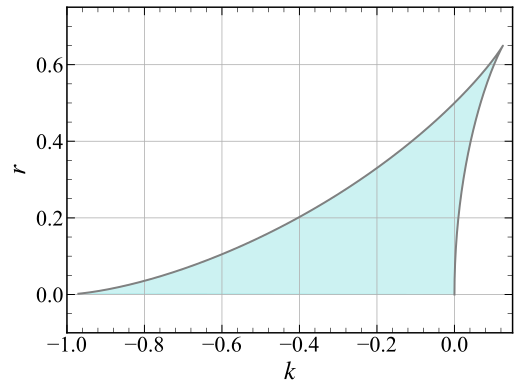

In [81]:
# plot the stability diagram 
# determine (k,r) for the critical points 
xx = np.arange(0,10,0.01)
r_c = lr_x(xx)
k_c = lk_x(xx) 

# plot r(k) for the critical points 
# r(k) separates the regions with different number/types of FPs
fig, ax=plt.subplots()
ax.plot(k_c,r_c,color='gray',linewidth=2)
ax.fill(k_c,r_c,color='c',alpha=0.2)

#ax.text(0.65,0.43,'Bistable',transform=ax.transAxes,fontsize=24,fontfamily="sans")
#ax.text(0.6,0.8,'Outbreak',color='r',transform=ax.transAxes,fontsize=24,fontfamily='sans')
#ax.text(0.2,0.2,'Refuge',color='g',transform=ax.transAxes,fontsize=24,fontfamily='sans')

ax.grid()
ax.set_xlim(-1,.15)
ax.set_ylim(-.1,.75)
ax.set_xlabel('$k$')
ax.set_ylabel('$r$')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.show()

In [75]:
@interact(r=(0.2,1,0.1),grid=True)
def update(r=0.7):
    f = lambda x,k: f_sb(x,r,k)
    BF_diag(f,0,3,-.25,.24,x_lab='$k$')

interactive(children=(FloatSlider(value=0.7, description='r', max=1.0, min=0.2), Output()), _dom_classes=('wid…

## 3.7 Insect Outbreak

In [56]:
f_sb  = lambda x,r,k: r*x*(1-x/k)-x**2/(x**2+1)
fx_sb = lambda x,r,k: derivative(f_sb,x,dx=1e-6,args=(r,k,))

Bifurcation diagram $x^*=x^*(r;k)$

In [57]:
@interact(k=(2,20,1),grid=True)
def update(k=20):
    f = lambda x,r: f_sb(x,r,k)
    BF_diag(f,0,20,0.1,1,x_lab='$r$')

interactive(children=(IntSlider(value=20, description='k', max=20, min=2), Output()), _dom_classes=('widget-in…

Bifurcation diagram $x^*=x^*(k;r)$

In [58]:
@interact(r=(0.2,1,0.1),grid=True)
def update(r=0.2):
    f = lambda x,k: f_sb(x,r,k)
    BF_diag(f,0,20,1,20,x_lab='$k$')

interactive(children=(FloatSlider(value=0.2, description='r', max=1.0, min=0.2), Output()), _dom_classes=('wid…

Construct _stability diagram_ (regions with qualitatively different stable fixed points)

First, use `sympy` to calculate $k(x)$ and $r(x)$ as a function of the critical point $x=x_c$

In [59]:
# define symbolic variables
x,y,r,k = sp.symbols('x y r k',real=True)
# print the already defined function f(x,r,k) for the "spruce budworm" (insect) outbreak problem
f_sb(x,r,k)

r*x*(1 - x/k) - x**2/(x**2 + 1)

In [60]:
# calculate analytically df/dx
fx_sb = lambda x,r,k: sp.diff(f_sb(x,r,k),x).simplify()
fx_sb(x,r,k)

r - 2*x/(x**2 + 1)**2 - 2*r*x/k

In [61]:
# (1) find r(x,k) from f(x,r,k)=0  - fixed point eq.
f_r_kx = sp.solve(f_sb(x,r,k),r)[0].factor()
f_r_kx

-k*x/((-k + x)*(x**2 + 1))

In [62]:
# (2) find r(x,k) from f'(x,r,k)=0  - critical point
fx_r_kx = sp.solve(fx_sb(x,r,k),r)[0]
fx_r_kx

2*k*x/((k - 2*x)*(x**2 + 1)**2)

In [63]:
# combine (1)-(2) to obtain k(x) and r(x)
k_x = sp.solve(f_r_kx-fx_r_kx,k)[1]
r_x = f_r_kx.subs(k,k_x).factor()
display(Latex('$r(x) ={}$'.format(sp.latex(r_x))))
display(Latex('$k(x) ={}$'.format(sp.latex(k_x))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [64]:
# "lambdify" r(r) and k(x) to be used in numpy (numerical calculations)
lr_x = sp.lambdify(x,r_x)
lk_x = sp.lambdify(x,k_x)

Bifurcation diagram

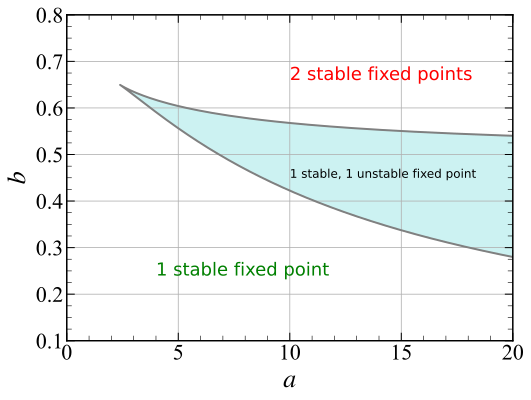

In [73]:
# plot the stability diagram 
# determine (k,r) for the critical points 
xx = np.arange(0,10,0.01)
r_c = lr_x(xx)
k_c = lk_x(xx)*2 -8

# plot r(k) for the critical points 
# r(k) separates the regions with different number/types of FPs
fig, ax=plt.subplots()
ax.plot(k_c,r_c,color='gray',linewidth=2)
ax.fill(k_c,r_c,color='c',alpha=0.2)

ax.text(0.50,0.50,'1 stable, 1 unstable fixed point',transform=ax.transAxes,fontsize=12,fontfamily="sans")
ax.text(0.5,0.8,'2 stable fixed points',color='r',transform=ax.transAxes,fontsize=18,fontfamily='sans')
ax.text(0.2,0.2,'1 stable fixed point',color='g',transform=ax.transAxes,fontsize=18,fontfamily='sans')

ax.grid()
ax.set_xlim(0,20)
ax.set_ylim(0.1,0.8)
ax.set_xlabel('$a$')
ax.set_ylabel('$b$')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.show()

3D surface plot of the fixed points $x^\star=x^\star(r,k)$ 

In [46]:
# Plot FPs x*(r,k) 
m_tick_off()
kk = np.linspace(0,20,50)
xx = np.linspace(0,20,50)
K,X= np.meshgrid(kk,xx)
R = X*K/(X**2+1)/(K-X)

R[R<0] = np.nan
R[R>1]= np.nan

@interact(elev=(-90,90,5),azim=(0,360,10),bd_xr=False,bd_k=(2,19,2),bd_xk=False,bd_r=(0.2,0.8,0.1))
def update(elev=40,azim=330,bd_xr=False,bd_k=2.5,bd_xk=False,bd_r=0.2):
    fig, ax = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})  

    # Creating plot 
    ax.plot_surface(K,R,X,cmap=plt.cm.hot,rstride=1,cstride=1,alpha=0.6) 
#     ax.plot_wireframe(K,R,X,rstride=1,cstride=1,color='k',linewidth=1,alpha=0.2)

    if bd_xk:
        ax.contour(K,R,X,zdir='y',levels=[bd_r],offset=1,colors='m',alpha=0.5)
    if bd_xr:
        ax.contour(K,R,X,zdir='x',levels=[bd_k],offset=0,colors='r',alpha=0.5)


    ax.set_zlim3d(0,20)
    ax.set_xlim3d(0,20)
    ax.set_ylim3d(0.1,1)
    ax.set_zticks(np.arange(0,20,5))
    ax.set_xticks(np.arange(0,20,2))
    ax.set_xlabel('$k$')
    ax.set_ylabel('$r$')
    ax.set_zlabel('$x$')
    ax.view_init(elev,azim)      
 
    # show plot 
    plt.show() 

interactive(children=(IntSlider(value=40, description='elev', max=90, min=-90, step=5), IntSlider(value=330, d…